# DMPM lab 10 :  K Means clustering on protein dataset

## Sarosh Dandoti
## SRN: 201900207
## Roll no.: 08

In [19]:
import pandas as pd
from matplotlib import pyplot as plot
import seaborn as sb

In [2]:
protein = pd.read_csv("D:/TY sem6/DMPM LAB/assn8/protein.csv")

In [3]:
protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [4]:
protein.isnull().sum()

Country      0
RedMeat      0
WhiteMeat    0
Eggs         0
Milk         0
Fish         0
Cereals      0
Starch       0
Nuts         0
Fr&Veg       0
dtype: int64

In [5]:
protein["Country"].value_counts()

Netherlands       1
Poland            1
UK                1
Ireland           1
Austria           1
Finland           1
Denmark           1
Sweden            1
Switzerland       1
Hungary           1
Norway            1
USSR              1
Greece            1
France            1
Romania           1
Albania           1
Spain             1
Czechoslovakia    1
W Germany         1
Portugal          1
Belgium           1
E Germany         1
Bulgaria          1
Yugoslavia        1
Italy             1
Name: Country, dtype: int64

In [6]:
protein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    25 non-null     object 
 1   RedMeat    25 non-null     float64
 2   WhiteMeat  25 non-null     float64
 3   Eggs       25 non-null     float64
 4   Milk       25 non-null     float64
 5   Fish       25 non-null     float64
 6   Cereals    25 non-null     float64
 7   Starch     25 non-null     float64
 8   Nuts       25 non-null     float64
 9   Fr&Veg     25 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB


In [7]:
X = protein.drop("Country",axis=1)
y = protein["Country"]

In [8]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#y = le.fit_transform(y)


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RedMeat    25 non-null     float64
 1   WhiteMeat  25 non-null     float64
 2   Eggs       25 non-null     float64
 3   Milk       25 non-null     float64
 4   Fish       25 non-null     float64
 5   Cereals    25 non-null     float64
 6   Starch     25 non-null     float64
 7   Nuts       25 non-null     float64
 8   Fr&Veg     25 non-null     float64
dtypes: float64(9)
memory usage: 1.9 KB


In [10]:
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [11]:
y.head(20)

0            Albania
1            Austria
2            Belgium
3           Bulgaria
4     Czechoslovakia
5            Denmark
6          E Germany
7            Finland
8             France
9             Greece
10           Hungary
11           Ireland
12             Italy
13       Netherlands
14            Norway
15            Poland
16          Portugal
17           Romania
18             Spain
19            Sweden
Name: Country, dtype: object

### Scaling

In [12]:
cols = X.columns

In [13]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [14]:
X = pd.DataFrame(X, columns=[cols])

In [15]:
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,0.419118,0.000000,0.000000,0.138889,0.000000,0.622047,0.000000,0.676056,0.046154
1,0.330882,1.000000,0.904762,0.520833,0.135714,0.246719,0.508475,0.084507,0.446154
2,0.669118,0.626984,0.857143,0.437500,0.307143,0.209974,0.864407,0.197183,0.400000
3,0.250000,0.365079,0.261905,0.118056,0.071429,1.000000,0.084746,0.422535,0.430769
4,0.389706,0.793651,0.547619,0.263889,0.128571,0.412073,0.745763,0.056338,0.400000


## Before clustering

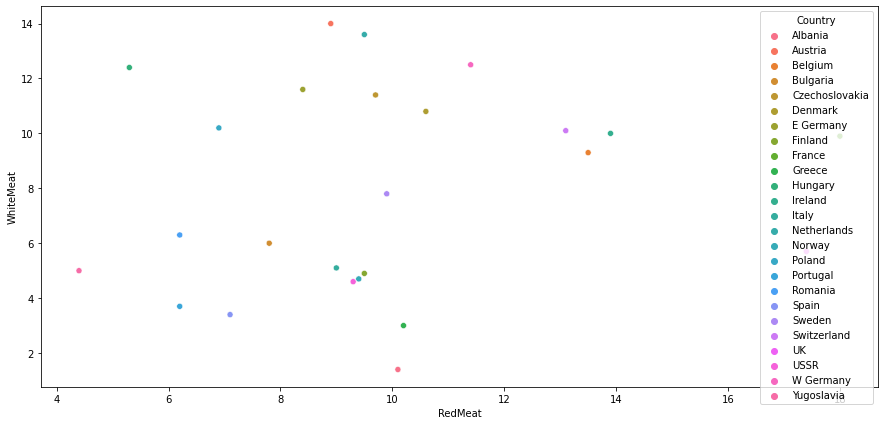

In [20]:
plot.figure(1, (15, 7))
sb.scatterplot(x='RedMeat', y='WhiteMeat', hue='Country',data=protein, legend="full")
plot.show()

## K-Means Clustering

### K=2


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, train_size=0.8)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)


(20, 9) (5, 9) (20,) (5,)


In [26]:
model = KMeans(3)
model.fit(X,y)
model


KMeans(n_clusters=3)

In [27]:
from matplotlib import pyplot as plot
import seaborn as sb
import random

In [28]:
colors = list(sb.color_palette("dark"))
colors = random.sample(colors, k=model.cluster_centers_.shape[0])
colors


[(0.0, 0.38823529411764707, 0.4549019607843137),
 (0.0, 0.10980392156862745, 0.4980392156862745),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745)]

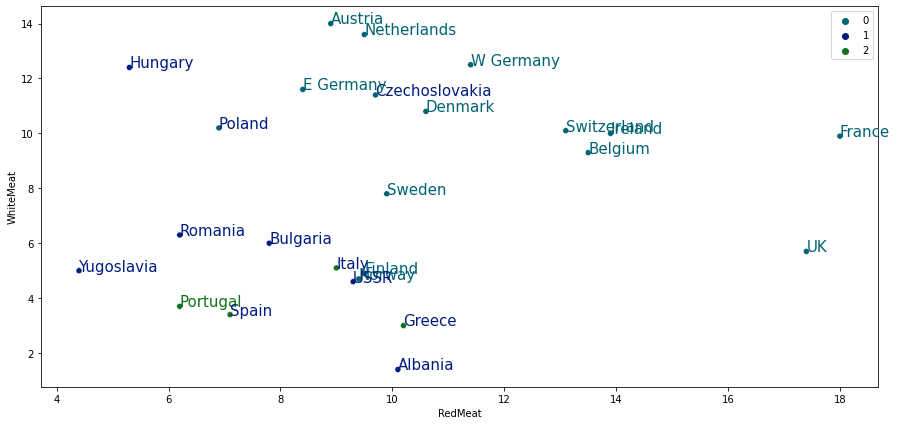

In [29]:
df=protein
plot.figure(1, (15, 7))
sb.scatterplot(x='RedMeat', y='WhiteMeat', hue=model.labels_, data=df, legend="full",palette=colors)
for i in range(df.shape[0]):
    plot.text(x=df['RedMeat'][i], y=df['WhiteMeat'][i], s=df['Country'][i], fontdict={'size': 15,'color': colors[model.predict(df.drop(['Country'], axis=1))[i]]})
    pass
plot.show()

### K=5

In [30]:
model = KMeans(5)
model.fit(X,y)
model


KMeans(n_clusters=5)

In [31]:
colors = list(sb.color_palette("dark"))
colors = random.sample(colors, k=model.cluster_centers_.shape[0])
colors


[(0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.5490196078431373, 0.03137254901960784, 0.0)]

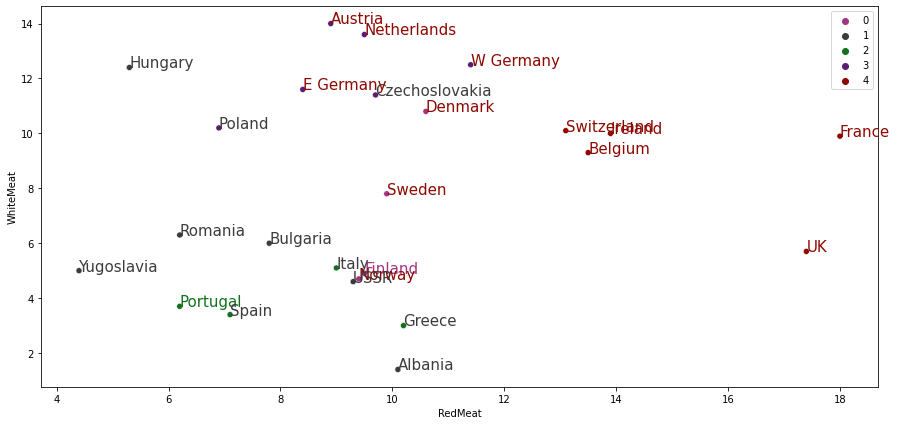

In [32]:
plot.figure(1, (15, 7))
sb.scatterplot(x='RedMeat', y='WhiteMeat', hue=model.labels_, data=df, legend="full",palette=colors)
for i in range(df.shape[0]):
    plot.text(x=df['RedMeat'][i], y=df['WhiteMeat'][i], s=df['Country'][i], fontdict={'size': 15,'color': colors[model.predict(df.drop(['Country'], axis=1))[i]]})
    pass
plot.show()

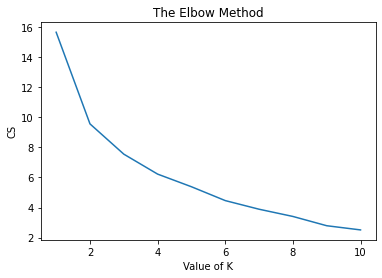

In [49]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X,y)
    cs.append(kmeans.inertia_)
plot.plot(range(1, 11), cs)
plot.title('The Elbow Method')
plot.xlabel('Value of K')
plot.ylabel('CS')
plot.show()

# The end
